<a href="https://colab.research.google.com/github/Aldistwn29/Data_analysis/blob/main/Regresi_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaray

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [ ]:
df = pd.read_csv('data_kecelakaan - Copy.csv')
df.head()

,jumlah pengemudi,faktor pengguna,faktor jalan,faktor kendaraan,pertumbuhan kendaraan bermotor
0,107,56,31,12,873
1,113,63,23,15,402
2,117,60,27,14,538
3,129,61,33,9,432
4,137,77,31,18,746


In [ ]:
df.shape

(12, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   jumlah pengemudi                12 non-null     int64
 1   faktor pengguna                 12 non-null     int64
 2   faktor jalan                    12 non-null     int64
 3   faktor kendaraan                12 non-null     int64
 4   pertumbuhan kendaraan bermotor  12 non-null     int64
dtypes: int64(5)
memory usage: 608.0 bytes


In [ ]:
df = df.rename(columns= {'jumlah pengemudi' : 'jumlah kecelakaan lalu lintas'})

# EDA

In [ ]:
df.describe()

,jumlah kecelakaan lalu lintas,faktor pengguna,faktor jalan,faktor kendaraan,pertumbuhan kendaraan bermotor
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,114.500000,60.250000,26.666667,13.083333,642.750000
std,11.587611,6.210329,5.382351,3.629634,198.474695
min,99.000000,54.000000,17.000000,9.000000,393.000000
25%,106.000000,56.000000,22.250000,10.750000,477.750000
50%,113.500000,59.500000,28.000000,12.500000,642.000000
75%,119.250000,61.500000,31.000000,14.250000,817.000000
max,137.000000,77.000000,33.000000,21.000000,904.000000


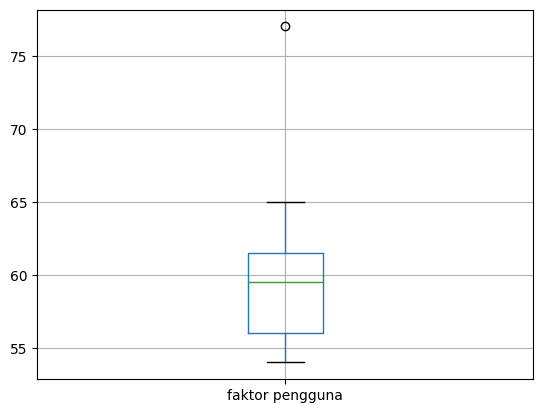

In [ ]:
boxplot = df.boxplot(column=['faktor pengguna'])

In [ ]:
# menggunakan rumus IQR
Q1 = df['faktor pengguna'].quantile(0.25)
Q3 = df['faktor pengguna'].quantile(0.75)

IQR = Q3 - Q1

# menghitung batas bawah dan atas
lower_limit = Q1 - 1.5 * IQR
upper_limmit = Q3 + 1.5 * IQR
print(f"lower limit: {lower_limit}")
print(f"upper limit: {upper_limmit}")

lower limit: 47.75
upper limit: 69.75


In [ ]:
new_df = df.copy()

In [ ]:
new_df = np.where(new_df['faktor pengguna'] > upper_limmit,
                  upper_limmit,
                  np.where(new_df['faktor pengguna'] < lower_limit,
                  lower_limit,
                  new_df['faktor pengguna']))

In [ ]:
new_df = pd.DataFrame(new_df, columns=['faktor pengendara'])

In [ ]:
data = pd.concat([df, new_df], axis=1)

In [ ]:
data.shape

(12, 5)

In [ ]:
data = data.drop(columns=['faktor pengguna'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   jumlah kecelakaan lalu lintas   12 non-null     int64  
 1   faktor jalan                    12 non-null     int64  
 2   faktor kendaraan                12 non-null     int64  
 3   pertumbuhan kendaraan bermotor  12 non-null     int64  
 4   faktor pengendara               12 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 608.0 bytes


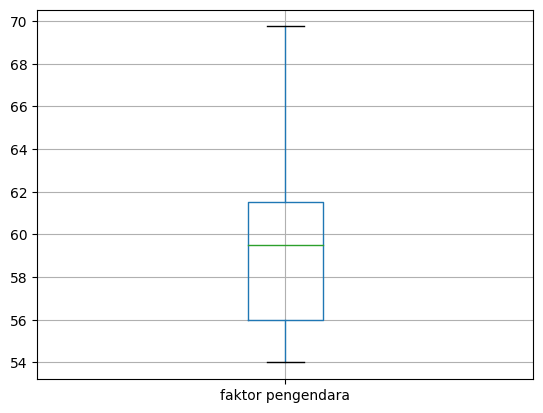

In [ ]:
boxplot = data.boxplot(column=[ 'faktor pengendara'])

<ipython-input-183-5a98f2506081>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['faktor pengguna'])


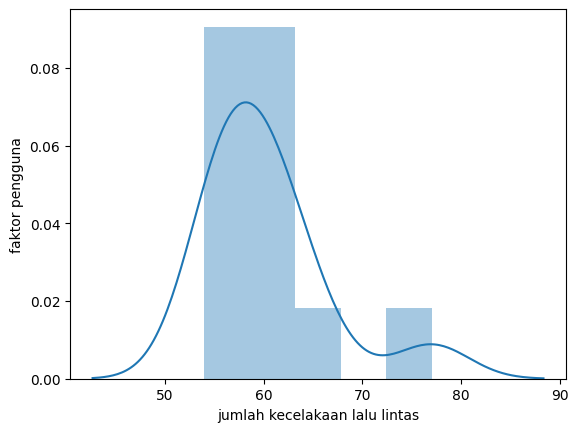

In [ ]:
# Visualisasi Distribusi

sns.distplot(df['faktor pengguna'])
plt.xlabel('jumlah kecelakaan lalu lintas')
plt.ylabel('faktor pengguna')
plt.show()

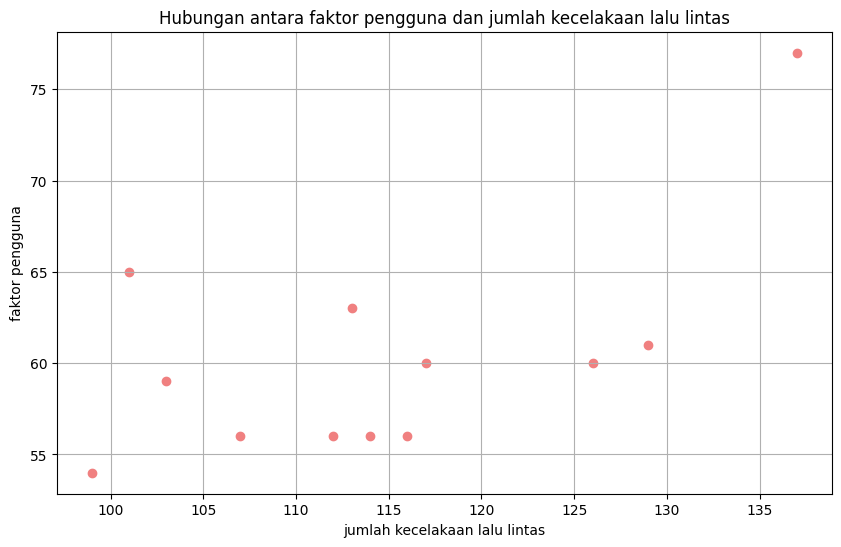

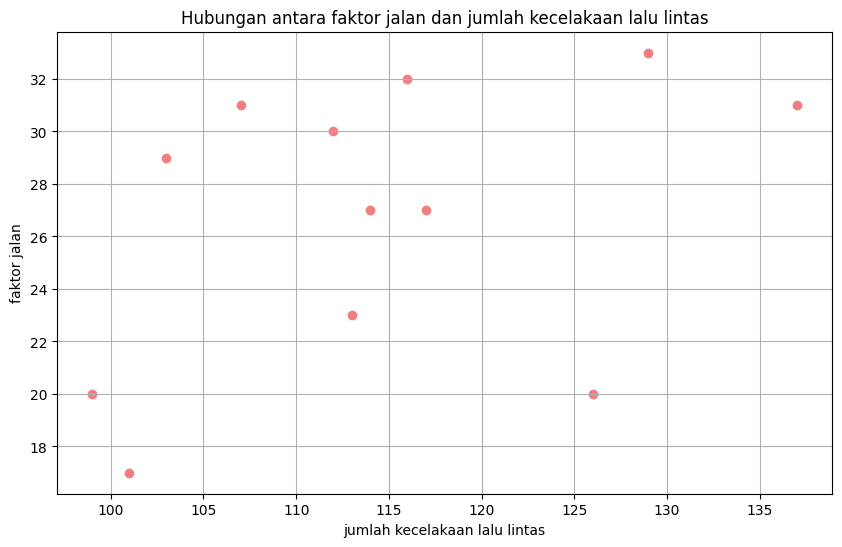

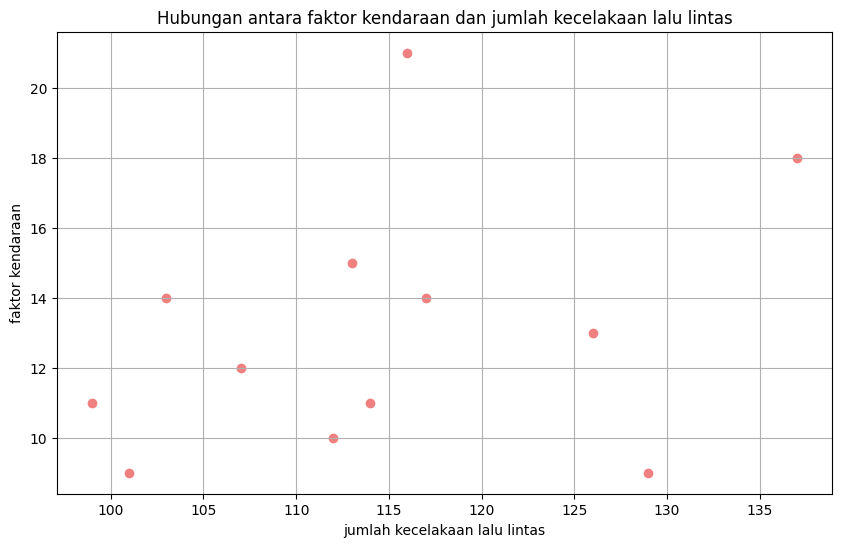

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hubungan antara 'jumlah kecelakaan lalu lintas' dan 'faktor pengguna'
plt.figure(figsize=(10, 6))
plt.scatter(df['jumlah kecelakaan lalu lintas'], df['faktor pengguna'], color='lightcoral')
plt.title('Hubungan antara faktor pengguna dan jumlah kecelakaan lalu lintas')
plt.xlabel('jumlah kecelakaan lalu lintas')
plt.ylabel('faktor pengguna')
plt.grid(True)
plt.show()

# Visualisasi hubungan antara 'jumlah kecelakaan lalu lintas' dan 'faktor jalan'
plt.figure(figsize=(10, 6))
plt.scatter(df['jumlah kecelakaan lalu lintas'], df['faktor jalan'], color='lightcoral')
plt.title('Hubungan antara faktor jalan dan jumlah kecelakaan lalu lintas')
plt.xlabel('jumlah kecelakaan lalu lintas')
plt.ylabel('faktor jalan')
plt.grid(True)
plt.show()

# Visualisasi hubungan antara 'jumlah kecelakaan lalu lintas' dan 'faktor kendaraan'
plt.figure(figsize=(10, 6))
plt.scatter(df['jumlah kecelakaan lalu lintas'], df['faktor kendaraan'], color='lightcoral')
plt.title('Hubungan antara faktor kendaraan dan jumlah kecelakaan lalu lintas')
plt.xlabel('jumlah kecelakaan lalu lintas')
plt.ylabel('faktor kendaraan')
plt.grid(True)
plt.show()

# Modeling

# Train dan Test

In [ ]:
# Train dan Test
# Variabel independen X
# Variabel dependen Y
X = df[["faktor pengguna", "faktor kendaraan","faktor jalan"]]
y = df["jumlah kecelakaan lalu lintas"]

print("X: ", X.shape)
print("y: ",y.shape)

X:  (12, 3)
y:  (12,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# mencari nilai coefisen dan intercept
print(f"Intercept : {model.intercept_}")
print(f"Slope : {model.coef_}")

Intercept : 25.302535347341404
Slope : [1.0655357  0.13015727 0.87360179]


- Coefisen
- rumusnya : β1 (slope) = Σ((x - x̄)(y - ȳ)) / Σ((x - x̄)²)
- rumusnya : β0 (intersep) = ȳ - β1 * x̄

In [ ]:
# # perhitungan manual
# # mengubah aray menjadi satu dimensi

# X = X.flatten()

# # Slope

# x_mean = np.mean(X)
# y_mean = np.mean(y)

# numerator = np.sum((X - x_mean) * (y - y_mean))
# denominator = np.sum((X - x_mean) ** 2)
# slope =  numerator / denominatot
# print(f"slope(B1):{slope}")

# # intercept

# intercept = y_mean - slope * x_mean
# print(f"intercept(B0):{intercept}" )

Persamanaanya didapat : Y = 2525.302535347341404 + 1.0655357 * X1 + 0.13015727 * X2 + 0.87360179 * X3

# Akurasi

In [ ]:
# R^2
from sklearn.metrics import r2_score

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R^2: {r2}")

R^2: 0.5228244064325223


In [ ]:
# Rmse
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")

RMSE: 7.663704237612321


# Pengecekan Syarat

- Homoskedaditas

Gold Quandt Test:
- H1 -> Null Hypothesis: Error terms are homoscedastic
- H1 -> Alt. Hyporhesis : Error are heteroscedenastic

In [ ]:
residuals = y.values - y_pred

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F-Statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F-Statistic', 6.561258924385552), ('p-value', 0.07832999999329011)]

- normality Residual

<ipython-input-205-252237604562>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals, kde=True)


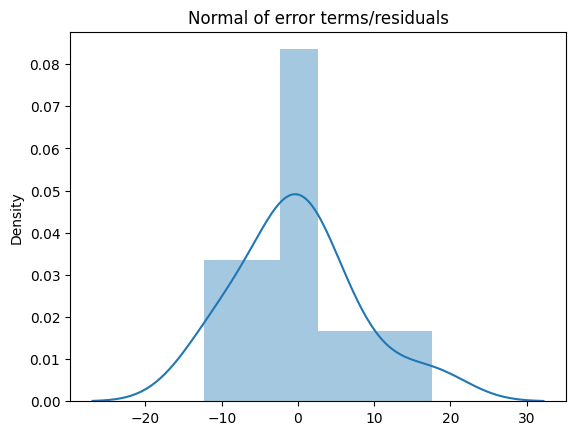

In [ ]:
p = sns.distplot(residuals, kde=True)
p = plt.title("Normal of error terms/residuals")

- independesi Residual (No auttocorelation)
- Ljungbox test.
1. H0 -> Null Hypothesis: Autocerrelation is absent
2. H1 -> Alt. Hypothesis: Autocerrelation is present

In [ ]:
import statsmodels.api as sm

sm.stats.acorr_ljungbox(residuals, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,5.863949,0.319683
